In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('injury_data.tsv', sep='\t')
df['2020/21 proj'] = df['2020/21'] * 3

In [34]:
df

,Country,Club,Type,2020/21,2019/20,2018/19,2017/18,2016/17,2020/21 proj
0,Germany,RB Leipzig,Injuries,14,35,26,30,19,42
1,Germany,RB Leipzig,Long-Term,5,11,10,6,5,15
2,Germany,RB Leipzig,Concurrent,5,6,5,4,4,15
3,Germany,RB Leipzig,Repeat,1,7,8,9,5,3
4,Germany,Borussia Dortmund,Injuries,22,40,58,45,59,66
...,...,...,...,...,...,...,...,...,...
115,France,Reims,Repeat,3,1,0,0,0,9
116,France,Rennes,Injuries,13,12,14,4,16,39
117,France,Rennes,Long-Term,8,5,10,3,8,24
118,France,Rennes,Concurrent,5,5,9,3,4,15


In [35]:
COLS = ["2016/17", "2017/18", "2018/19",  "2019/20",  "2020/21"]
PRIOR_YEARS = ["2016/17", "2017/18", "2018/19",  "2019/20"]

Injuries this Year

In [36]:
res = df[['Country', 'Club', '2020/21']].loc[(df['Type'] == 'Injuries')].sort_values(by='2020/21')

<AxesSubplot:xlabel='Club', ylabel='Injuries 2020/21'>

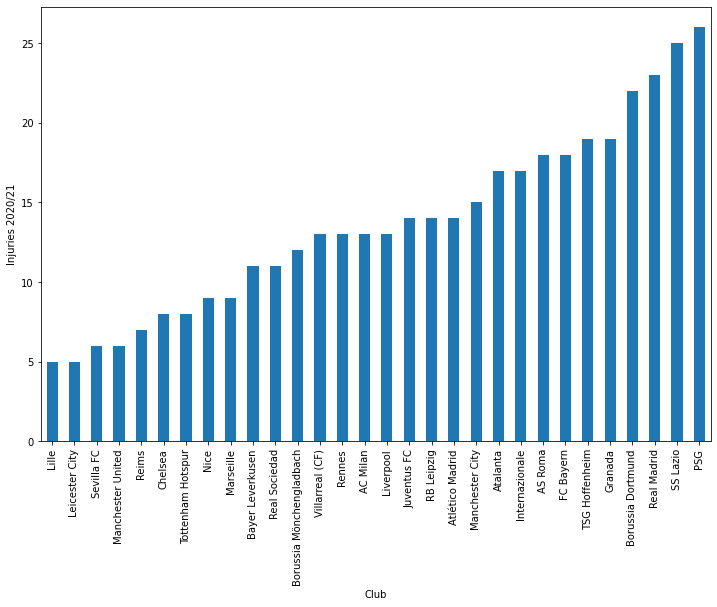

In [37]:
res.set_index('Club')['2020/21'].plot(kind='bar', figsize=(12,8), ylabel='Injuries 2020/21')

Injuries vs Time

In [38]:
def vs_time_plot(df, inj_type, clubs=None, countries=None):
    clubs = clubs if clubs else []
    countries = countries if countries else []

    if clubs:
        fltr = df['Club'].isin(clubs)
    elif countries:
        fltr = df['Country'].isin(countries)
    else:
        fltr = ~df.index.isna()
    
    res = df[
        ['Club', "2016/17", "2017/18", "2018/19",  "2019/20",  "2020/21"]
    ].loc[
        (df['Type'] == inj_type) & fltr
    ].set_index('Club')
    res.T.plot(figsize=(12,8), ylabel=f'{inj_type} vs Time')

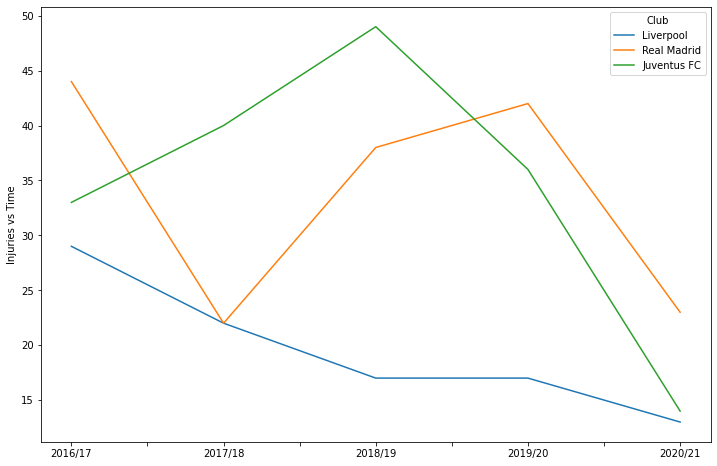

In [40]:
vs_time_plot(df, 'Injuries', clubs=['Liverpool', 'Juventus FC', 'Real Madrid'])

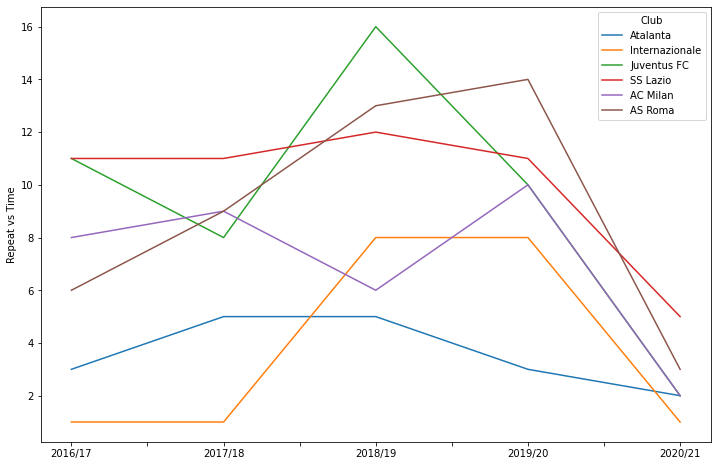

In [27]:
vs_time_plot(df, 'Repeat', countries=['Italy'])

In [28]:
def who_has_the_most_of(df, inj_type, year=None):
    if year:
        res = df[['Club', year]].loc[(df['Type'] == inj_type)]
        return res.iloc[res[year].argmax()]
    else:
        res = df[
            ['Club', "2016/17", "2017/18", "2018/19",  "2019/20",  "2020/21"]
        ].loc[(df['Type'] == inj_type)]
        rr = pd.concat([res.set_index('Club').idxmax(), res.set_index('Club').max()], axis=1)
        return rr[0].loc[rr[1].idxmax()], rr[1].max(), rr[1].idxmax()
    
def who_has_the_least_of(df, inj_type, year=None):
    if year:
        res = df[['Club', year]].loc[(df['Type'] == inj_type)]
        return res.iloc[res[year].argmin()]
    else:
        res = df[
            ['Club', "2016/17", "2017/18", "2018/19",  "2019/20",  "2020/21"]
        ].loc[(df['Type'] == inj_type)]
        rr = pd.concat([res.set_index('Club').idxmax(), res.set_index('Club').min()], axis=1)
        return rr[0].loc[rr[1].idxmin()], rr[1].min(), rr[1].idxmin()

In [29]:
who_has_the_most_of(df, 'Long-Term', year='2016/17')

Club       Borussia Mönchengladbach
2016/17                          17
Name: 9, dtype: object

In [30]:
who_has_the_most_of(df, 'Injuries', year=None)

('Borussia Dortmund', 59, '2016/17')

In [16]:
who_has_the_least_of(df, 'Concurrent', year='2017/18')

Club       Reims
2017/18        1
Name: 114, dtype: object

In [17]:
def compare_countries(df, inj_type):
    res = df.loc[(df['Type'] == inj_type)].groupby('Country')[COLS + ['2020/21 proj']].mean()
    res.plot(kind='bar', ylabel=f'Average {inj_type}', figsize=(12,8))

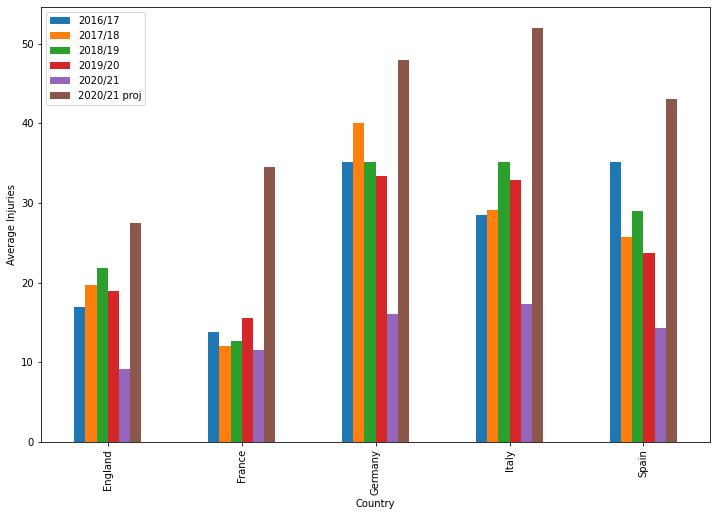

In [18]:
compare_countries(df, 'Injuries')